In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.metrics import r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import xgboost

Using TensorFlow backend.


In [2]:
# Load the dataset 

cars_new= pd.read_csv("final data.csv")

In [3]:
# Look at the first 5 rows

cars_new.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,No_of_Years,CNG,Diesel,Electric,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
0,72000,26.60,998.0,58.16,5.0,3192.88,10,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,5.0,22806.30,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,5.0,8210.27,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,7.0,10947.02,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,5.0,32366.70,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Look at the last 5 rows

cars_new.tail()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,No_of_Years,CNG,Diesel,Electric,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
6014,27365,28.40,1248.0,74.0,5.0,8666.39,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6015,100000,24.40,1120.0,71.0,5.0,7298.02,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6016,55000,14.00,2498.0,112.0,8.0,5291.06,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6017,46000,18.90,998.0,67.1,5.0,4834.94,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6018,47000,25.44,936.0,57.6,5.0,4561.26,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building 

#### We will be making Y as the target variable by only passing the Price column from the original data

In [5]:
X = cars_new.drop('Price',axis=1)
Y = cars_new['Price']

In [6]:
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,No_of_Years,CNG,Diesel,Electric,LPG,...,Volkswagen CrossPolo,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60
0,72000,26.60,998.0,58.16,5.0,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,5.0,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,5.0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,7.0,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,5.0,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y.head()

0     3192.88
1    22806.30
2     8210.27
3    10947.02
4    32366.70
Name: Price, dtype: float64

# Splitting data with a test size of 0.25

In [8]:
X_train1,X_test1,y_train1,y_test1= train_test_split(X,Y,test_size=0.25, random_state = 0)

In [9]:
# Scaling the Train and Test data using Minmax Scaler

minma = MinMaxScaler()
minma.fit(X_train1)
X_train1 = minma.transform(X_train1)
X_test1 = minma.transform(X_test1)

# Linear Regression 

In [93]:
reg = LinearRegression()
reg = reg.fit(X_train1,y_train1)
train_pred1 = reg.predict(X_train1)
test_pred1 = reg.predict(X_test1)
print("Accuracy for Test set: "+"{:.2f}".format(reg.score(X_test1,y_test1)))
print("Accuracy for Training set: "+"{:.2f}".format(reg.score(X_train1,y_train1)))

Accuracy for Test set: -181465525571635740672.00
Accuracy for Training set: 0.85


In [94]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test1,test_pred1))

274771265431764.22

In [95]:
MAE_train=np.mean(abs(y_train1-train_pred1))/np.mean(y_train1)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test1-test_pred1))/np.mean(y_test1)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 24.7
Tree on test set MAE%: 47701943920.3


In [96]:
y_test1

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
817      9578.65
3325    12315.40
1875    18427.49
2861    11676.83
2315     8483.94
Name: Price, Length: 1505, dtype: float64

In [97]:
test_pred1

array([17900.68271031,  6555.9309583 ,  5973.22780625, ...,
       20767.69954589,  9310.22289391, 13850.54385899])

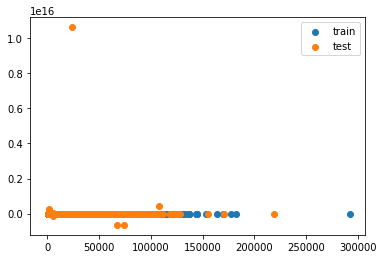

In [98]:
# Create a scatter plot with train and test

plt.scatter(y_train1, train_pred1, label='train')
plt.scatter(y_test1, test_pred1, label='test')
plt.legend()
plt.show()

# K Neighbor Regressor Model

In [100]:
k_reg=KNeighborsRegressor()
k_reg = k_reg.fit(X_train1,y_train1)
train_pred1 = k_reg.predict(X_train1)
test_pred1=k_reg.predict(X_test1)
print("Accuracy for Test set: "+"{:.2f}".format(k_reg.score(X_test1,y_test1)))
print("Accuracy for Training set: "+"{:.2f}".format(k_reg.score(X_train1,y_train1)))

Accuracy for Test set: 0.84
Accuracy for Training set: 0.91


In [101]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test1,test_pred1))

8034.2664276561845

In [102]:
MAE_train=np.mean(abs(y_train1-train_pred1))/np.mean(y_train1)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test1-test_pred1))/np.mean(y_test1)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 15.0
Tree on test set MAE%: 19.2


In [103]:
y_test1

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
817      9578.65
3325    12315.40
1875    18427.49
2861    11676.83
2315     8483.94
Name: Price, Length: 1505, dtype: float64

In [104]:
test_pred1

array([15387.868,  6199.664,  6104.792, ..., 22368.42 ,  9746.5  ,
       10914.182])

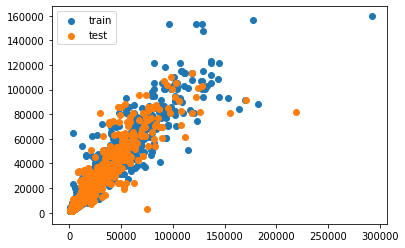

In [105]:
# Create a scatter plot with train and test

plt.scatter(y_train1, train_pred1, label='train')
plt.scatter(y_test1, test_pred1, label='test')
plt.legend()
plt.show()

# Decision Tree Regressor Model 

In [51]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train1,y_train1)
train_pred1 = dec_reg.predict(X_train1)
test_pred1=dec_reg.predict(X_test1)
print("Accuracy for Test set: "+"{:.2f}".format(dec_reg.score(X_test1,y_test1)))
print("Accuracy for Training set: "+"{:.2f}".format(dec_reg.score(X_train1,y_train1)))

Accuracy for Test set: 0.81
Accuracy for Training set: 1.00


In [52]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test1,test_pred1))

8953.435931313523

In [53]:
MAE_train=np.mean(abs(y_train1-train_pred1))/np.mean(y_train1)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test1-test_pred1))/np.mean(y_test1)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 0.0
Tree on test set MAE%: 20.1


In [54]:
y_test1

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
817      9578.65
3325    12315.40
1875    18427.49
2861    11676.83
2315     8483.94
Name: Price, Length: 1505, dtype: float64

In [55]:
test_pred1

array([14176.4 ,  5382.29,  7827.12, ..., 19613.42, 10290.2 , 10126.  ])

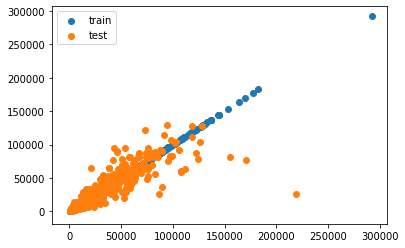

In [56]:
# Create a scatter plot with train and test

plt.scatter(y_train1, train_pred1, label='train')
plt.scatter(y_test1, test_pred1, label='test')
plt.legend()
plt.show()

# Random Forest Regressor Model 

In [113]:
rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train1,y_train1)
train_pred1 = rf_reg.predict(X_train1)
test_pred1=rf_reg.predict(X_test1)
print("Accuracy for Test set: "+"{:.2f}".format(rf_reg.score(X_test1,y_test1)))
print("Accuracy for Training set: "+"{:.2f}".format(rf_reg.score(X_train1,y_train1)))

Accuracy for Test set: 0.89
Accuracy for Training set: 0.99


In [114]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test1,test_pred1))

6789.016632990228

In [115]:
MAE_train=np.mean(abs(y_train1-train_pred1))/np.mean(y_train1)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test1-test_pred1))/np.mean(y_test1)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 6.1
Tree on test set MAE%: 16.1


In [116]:
y_test1

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
817      9578.65
3325    12315.40
1875    18427.49
2861    11676.83
2315     8483.94
Name: Price, Length: 1505, dtype: float64

In [117]:
test_pred1

array([14406.1947,  5702.1225,  7280.2295, ..., 20101.1098,  8593.5952,
       10762.0181])

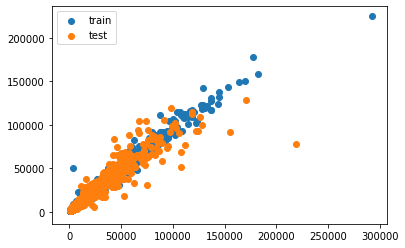

In [118]:
# Create a scatter plot with train and test

plt.scatter(y_train1, train_pred1, label='train')
plt.scatter(y_test1, test_pred1, label='test')
plt.legend()
plt.show()

# Gradient Boosting Regression Model  

In [119]:
gb_reg = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=300,
                                random_state=10)
gb_reg.fit(X_train1,y_train1)
train_pred1 = gb_reg.predict(X_train1)
test_pred1=gb_reg.predict(X_test1)
print("Accuracy for Test set: "+"{:.2f}".format(gb_reg.score(X_test1,y_test1)))
print("Accuracy for Training set: "+"{:.2f}".format(gb_reg.score(X_train1,y_train1)))

Accuracy for Test set: 0.43
Accuracy for Training set: 0.43


In [120]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test1,test_pred1))

15460.90949326265

In [121]:
MAE_train=np.mean(abs(y_train1-train_pred1))/np.mean(y_train1)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test1-test_pred1))/np.mean(y_test1)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 52.5
Tree on test set MAE%: 51.0


In [122]:
y_test1

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
817      9578.65
3325    12315.40
1875    18427.49
2861    11676.83
2315     8483.94
Name: Price, Length: 1505, dtype: float64

In [123]:
test_pred1

array([18014.68792004, 13259.57625078, 12199.27799922, ...,
       19396.96804337, 13386.4325481 , 13938.28627713])

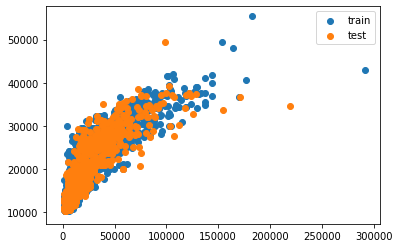

In [124]:
# Create a scatter plot with train and test

plt.scatter(y_train1, train_pred1, label='train')
plt.scatter(y_test1, test_pred1, label='test')
plt.legend()
plt.show()

# Ridge Regression Model 

In [125]:
clf = Ridge(alpha=1.0)
clf.fit(X_train1,y_train1)
train_pred1 = clf.predict(X_train1)
test_pred1=clf.predict(X_test1)
print("Accuracy for Test set: "+"{:.2f}".format(clf.score(X_test1,y_test1)))
print("Accuracy for Training set: "+"{:.2f}".format(clf.score(X_train1,y_train1)))

Accuracy for Test set: 0.83
Accuracy for Training set: 0.84


In [126]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test1,test_pred1))

8492.179449119649

In [127]:
MAE_train=np.mean(abs(y_train1-train_pred1))/np.mean(y_train1)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test1-test_pred1))/np.mean(y_test1)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 26.2
Tree on test set MAE%: 25.8


In [128]:
y_test1

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
817      9578.65
3325    12315.40
1875    18427.49
2861    11676.83
2315     8483.94
Name: Price, Length: 1505, dtype: float64

In [129]:
test_pred1

array([17965.36342422,  8448.04641118,  5765.82573329, ...,
       21413.23778043,  9226.62022778, 13272.8856628 ])

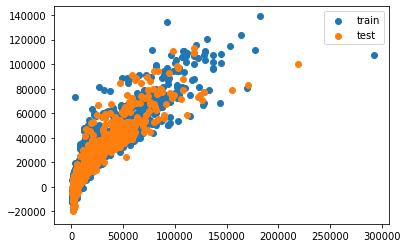

In [130]:
# Create a scatter plot with train and test

plt.scatter(y_train1, train_pred1, label='train')
plt.scatter(y_test1, test_pred1, label='test')
plt.legend()
plt.show()

# Lasso Regression Model 

In [131]:
las = linear_model.Lasso(alpha=1)
las.fit(X_train1,y_train1)
train_pred1 = las.predict(X_train1)
test_pred1=las.predict(X_test1)
print("Accuracy for Test set: "+"{:.2f}".format(las.score(X_test1,y_test1)))
print("Accuracy for Training set: "+"{:.2f}".format(las.score(X_train1,y_train1)))

Accuracy for Test set: 0.81
Accuracy for Training set: 0.85


In [132]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test1,test_pred1))

8956.915858623011

In [133]:
MAE_train=np.mean(abs(y_train1-train_pred1))/np.mean(y_train1)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test1-test_pred1))/np.mean(y_test1)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 25.0
Tree on test set MAE%: 25.6


In [134]:
y_test1

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
817      9578.65
3325    12315.40
1875    18427.49
2861    11676.83
2315     8483.94
Name: Price, Length: 1505, dtype: float64

In [135]:
test_pred1

array([17951.39108078,  7593.37086433,  5900.85708136, ...,
       20993.04738921,  9270.30265887, 13551.27629861])

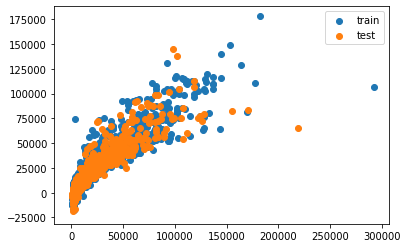

In [136]:
# Create a scatter plot with train and test

plt.scatter(y_train1, train_pred1, label='train')
plt.scatter(y_test1, test_pred1, label='test')
plt.legend()
plt.show()

# Artificial Neural Network Model (Keras)

In [29]:
np.random.seed(1337)
model = Sequential()
model.add(Dense(200,activation='relu',input_dim=231))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

In [30]:

model.compile(optimizer ='adam', loss='mse')
model.fit(X_train1, y_train1, epochs=400,batch_size=8,shuffle=False)

Epoch 1/400
4514/4514 [==============================] - 2s 452us/step - loss: 553777742.5547
Epoch 2/400
4514/4514 [==============================] - 2s 369us/step - loss: 314818268.2508
Epoch 3/400
4514/4514 [==============================] - 2s 344us/step - loss: 256547714.5751
Epoch 4/400
4514/4514 [==============================] - 2s 347us/step - loss: 213270106.0022
Epoch 5/400
4514/4514 [==============================] - 2s 354us/step - loss: 183270126.0425
Epoch 6/400
4514/4514 [==============================] - 2s 350us/step - loss: 169782096.5007
Epoch 7/400
4514/4514 [==============================] - 2s 376us/step - loss: 155759574.0656
Epoch 8/400
4514/4514 [==============================] - 2s 370us/step - loss: 144434558.2822
Epoch 9/400
4514/4514 [==============================] - 2s 386us/step - loss: 131350421.8883
Epoch 10/400
4514/4514 [==============================] - 2s 372us/step - loss: 123813232.7466
Epoch 11/400
4514/4514 [==============================] - 2

4514/4514 [==============================] - 2s 382us/step - loss: 35505236.0409
Epoch 89/400
4514/4514 [==============================] - 2s 358us/step - loss: 33752579.4912
Epoch 90/400
4514/4514 [==============================] - 2s 369us/step - loss: 34133697.4053
Epoch 91/400
4514/4514 [==============================] - 2s 377us/step - loss: 35033765.8406
Epoch 92/400
4514/4514 [==============================] - 2s 372us/step - loss: 34550364.7916
Epoch 93/400
4514/4514 [==============================] - 2s 382us/step - loss: 34205921.4309
Epoch 94/400
4514/4514 [==============================] - 2s 368us/step - loss: 32484256.5733
Epoch 95/400
4514/4514 [==============================] - 2s 361us/step - loss: 37011073.0182
Epoch 96/400
4514/4514 [==============================] - 2s 359us/step - loss: 34017346.8509
Epoch 97/400
4514/4514 [==============================] - 2s 371us/step - loss: 32129907.6661
Epoch 98/400
4514/4514 [==============================] - 2s 367us/step -

4514/4514 [==============================] - 2s 382us/step - loss: 29418274.1128
Epoch 175/400
4514/4514 [==============================] - 2s 367us/step - loss: 31729684.2017
Epoch 176/400
4514/4514 [==============================] - 2s 379us/step - loss: 30966568.1376
Epoch 177/400
4514/4514 [==============================] - 2s 381us/step - loss: 31192103.4599
Epoch 178/400
4514/4514 [==============================] - 2s 392us/step - loss: 31424374.8800
Epoch 179/400
4514/4514 [==============================] - 2s 383us/step - loss: 32857293.6286
Epoch 180/400
4514/4514 [==============================] - 2s 382us/step - loss: 33469497.3211
Epoch 181/400
4514/4514 [==============================] - 2s 368us/step - loss: 32847079.6727
Epoch 182/400
4514/4514 [==============================] - 2s 400us/step - loss: 30172320.7869
Epoch 183/400
4514/4514 [==============================] - 2s 368us/step - loss: 32220192.2638
Epoch 184/400
4514/4514 [==============================] - 2s 37

4514/4514 [==============================] - 2s 388us/step - loss: 29103415.2637
Epoch 261/400
4514/4514 [==============================] - 2s 377us/step - loss: 29423648.8609
Epoch 262/400
4514/4514 [==============================] - 2s 378us/step - loss: 29267470.5797
Epoch 263/400
4514/4514 [==============================] - 2s 368us/step - loss: 32407165.7378
Epoch 264/400
4514/4514 [==============================] - 2s 370us/step - loss: 31684984.0371
Epoch 265/400
4514/4514 [==============================] - 2s 378us/step - loss: 31525615.7121
Epoch 266/400
4514/4514 [==============================] - 2s 368us/step - loss: 29467629.6213
Epoch 267/400
4514/4514 [==============================] - 2s 365us/step - loss: 30574321.6298
Epoch 268/400
4514/4514 [==============================] - 2s 381us/step - loss: 30957047.3225
Epoch 269/400
4514/4514 [==============================] - 2s 365us/step - loss: 31834754.5811
Epoch 270/400
4514/4514 [==============================] - 2s 36

4514/4514 [==============================] - 2s 381us/step - loss: 27943172.99860s - loss: 28719
Epoch 347/400
4514/4514 [==============================] - 2s 367us/step - loss: 28499869.3584
Epoch 348/400
4514/4514 [==============================] - 2s 364us/step - loss: 29692585.9025
Epoch 349/400
4514/4514 [==============================] - 2s 365us/step - loss: 29970074.1527
Epoch 350/400
4514/4514 [==============================] - 2s 362us/step - loss: 28314515.1003
Epoch 351/400
4514/4514 [==============================] - 2s 369us/step - loss: 28906868.8779
Epoch 352/400
4514/4514 [==============================] - 2s 364us/step - loss: 29247249.4374
Epoch 353/400
4514/4514 [==============================] - 2s 365us/step - loss: 29241214.4425
Epoch 354/400
4514/4514 [==============================] - 2s 366us/step - loss: 29192150.4304
Epoch 355/400
4514/4514 [==============================] - 2s 384us/step - loss: 27937010.5423
Epoch 356/400
4514/4514 [=======================

In [39]:
test_pred1 = model.predict(X_test1)
train_pred1= model.predict(X_train1)

In [40]:
yu =test_pred1.flatten()
yu
train_u = train_pred1.flatten()

In [42]:
y_test1

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
          ...   
817      9578.65
3325    12315.40
1875    18427.49
2861    11676.83
2315     8483.94
Name: Price, Length: 1505, dtype: float64

In [43]:
test_pred1

array([[15987.034 ],
       [ 6418.4272],
       [ 6527.1367],
       ...,
       [20329.512 ],
       [ 8645.916 ],
       [10101.072 ]], dtype=float32)

In [44]:
print("Accuracy for Test set: "+"{:.2f}".format(r2_score(y_test1,yu)))
print("Accuracy for Training set: "+"{:.2f}".format(r2_score(y_train1,train_u)))

Accuracy for Test set: 0.89
Accuracy for Training set: 0.94


In [45]:
MAE_train=np.mean(abs(y_train1-train_u))/np.mean(y_train1)
print("Tree on train set MAE%:", round(MAE_train*100,1))
MAE_test=np.mean(abs(y_test1-yu))/np.mean(y_test1)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 12.2
Tree on test set MAE%: 15.6


In [46]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test1,yu))

6903.904975204826

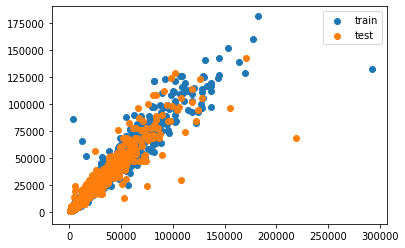

In [47]:
# Create a scatter plot with train and test

plt.scatter(y_train1, train_u, label='train')
plt.scatter(y_test1, yu, label='test')
plt.legend()
plt.show()

# XGBoost Regressor with K=5

In [149]:
# Parameter Tuning 
base_score=[0.25,0.5,0.75,1]
booster=['gbtree','gblinear']
n_estimators = [100, 500, 700, 1000, 1500]
max_depth = [2, 3, 5, 9]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
parameter_grid = {
    'base_score':base_score,
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    }

In [150]:
regressor=xgboost.XGBRegressor()
ran_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=35)

In [151]:
ran_cv.fit(X_train1,y_train1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 17.1min finished
C:\Users\amith\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:59:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [152]:
ran_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [57]:
# Run the model by passing the best estimator from the GridSearchCV method.

regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [58]:
regressor.fit(X_train1,y_train1)

C:\Users\amith\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:05:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
train_pred = regressor.predict(X_train1)
test_pred=regressor.predict(X_test1)

In [60]:
y_test1.head()

5150    13227.65
2164     7754.14
1136     7115.57
5641    15344.08
1515    24594.31
Name: Price, dtype: float64

In [61]:
print("Accuracy for Test set: "+"{:.2f}".format(regressor.score(X_test1,y_test1)))
print("Accuracy for Training set: "+"{:.2f}".format(regressor.score(X_train1,y_train1)))

Accuracy for Test set: 0.90
Accuracy for Training set: 0.99


In [62]:
MAE_train=np.mean(abs(y_train1-train_pred))/np.mean(y_train1)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test1-test_pred))/np.mean(y_test1)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 8.2
Tree on test set MAE%: 15.2


In [63]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test1,test_pred))

6424.2295739203455

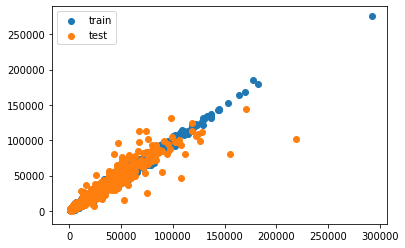

In [64]:
# Create a scatter plot with train and test

plt.scatter(y_train1, train_pred, label='train')
plt.scatter(y_test1, test_pred, label='test')
plt.legend()
plt.show()